In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot settings
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

### Accuracy as a function of Dataset size

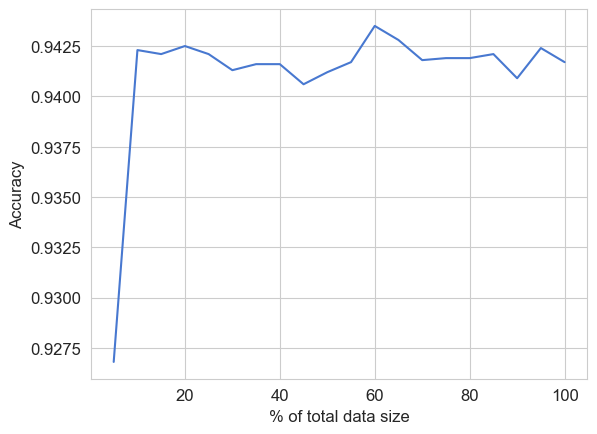

In [6]:
accuracy = np.load('Results/results_accuracy_sentence.npy')
numbers = np.arange(5, 101, 5)

plt.plot(numbers, accuracy)
plt.xlabel(r'% of total data size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

### Accuracy as a function of Chunk Size and Dataset Size

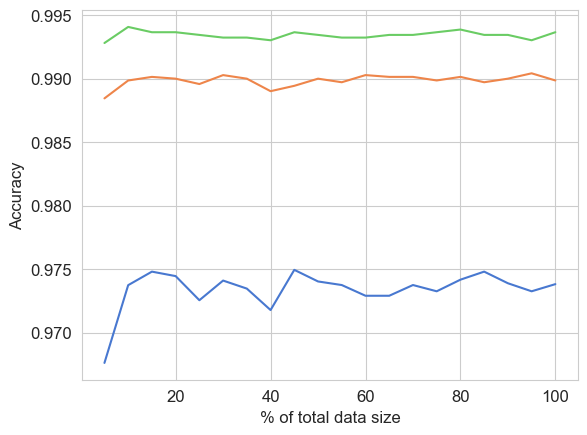

In [5]:
accuracy = np.load('Results/accuracy_chunk_sizes.npy')
numbers = np.arange(5, 101, 5)

for idx, acc in enumerate(accuracy):
    plt.plot(numbers, acc)
plt.xlabel(r'% of total data size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

### Accuracy of Neural Net with PCA reduction as a function of the number of components

#### Chunk Size 150

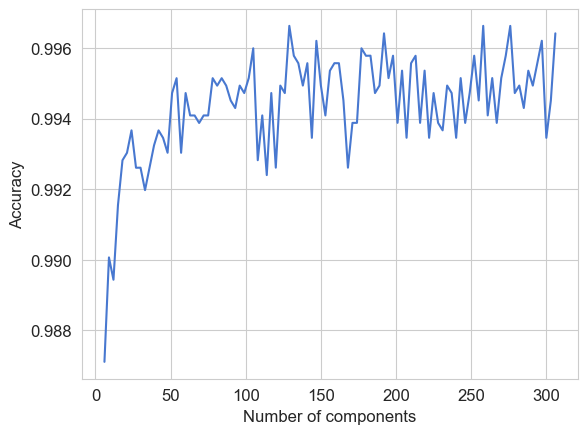

In [12]:
accuracy = np.load('Results/accuracy_pca_reduction_150_chunk.npy')
numbers = np.arange(6, 307, 3)

plt.plot(numbers, accuracy)
plt.xlabel(r'Number of components', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

#### Sentences

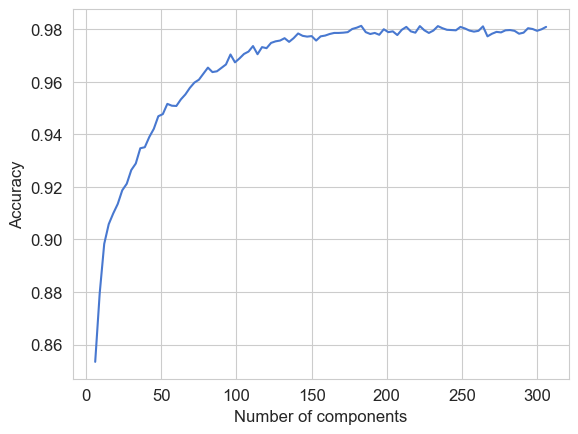

In [11]:
accuracy = np.load('Results/accuracy_pca_reduction_sentences.npy')
numbers = np.arange(6, 307, 3)

plt.plot(numbers, accuracy)
plt.xlabel(r'Number of components', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

### Visualization of Clustering

In [34]:
import umap
from sklearn.decomposition import PCA

#### Chunk Size 150

In [17]:
#### Chunk Size 150
X_chunk = np.load('Data/text_data150.npy')
y_chunk = np.load('Data/labels150.npy')

# with labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_chunk, y=y_chunk)
umap_chunk_labels = mapper.transform(X_chunk)

# without labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_chunk)
umap_chunk = mapper.transform(X_chunk)

## PCA
mapper = PCA(n_components=2).fit(X_chunk)
pca_chunk = mapper.transform(X_chunk)

#### Sentences
X_sent = np.load('Data/text_data_sentences.npy')
y_sent = np.load('Data/labels_sentences.npy')

# with labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_sent, y=y_sent)
umap_sentences_labels = mapper.transform(X_sent)

# without labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_sent)
umap_sentences = mapper.transform(X_sent)

## PCA
mapper = PCA(n_components=2).fit(X_sent)
pca_sentences = mapper.transform(X_sent)

c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\maria\anaconda3\envs\FYS-STK3155\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\maria\AppData\Local\Temp\ipykernel_57104\1492558238.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle


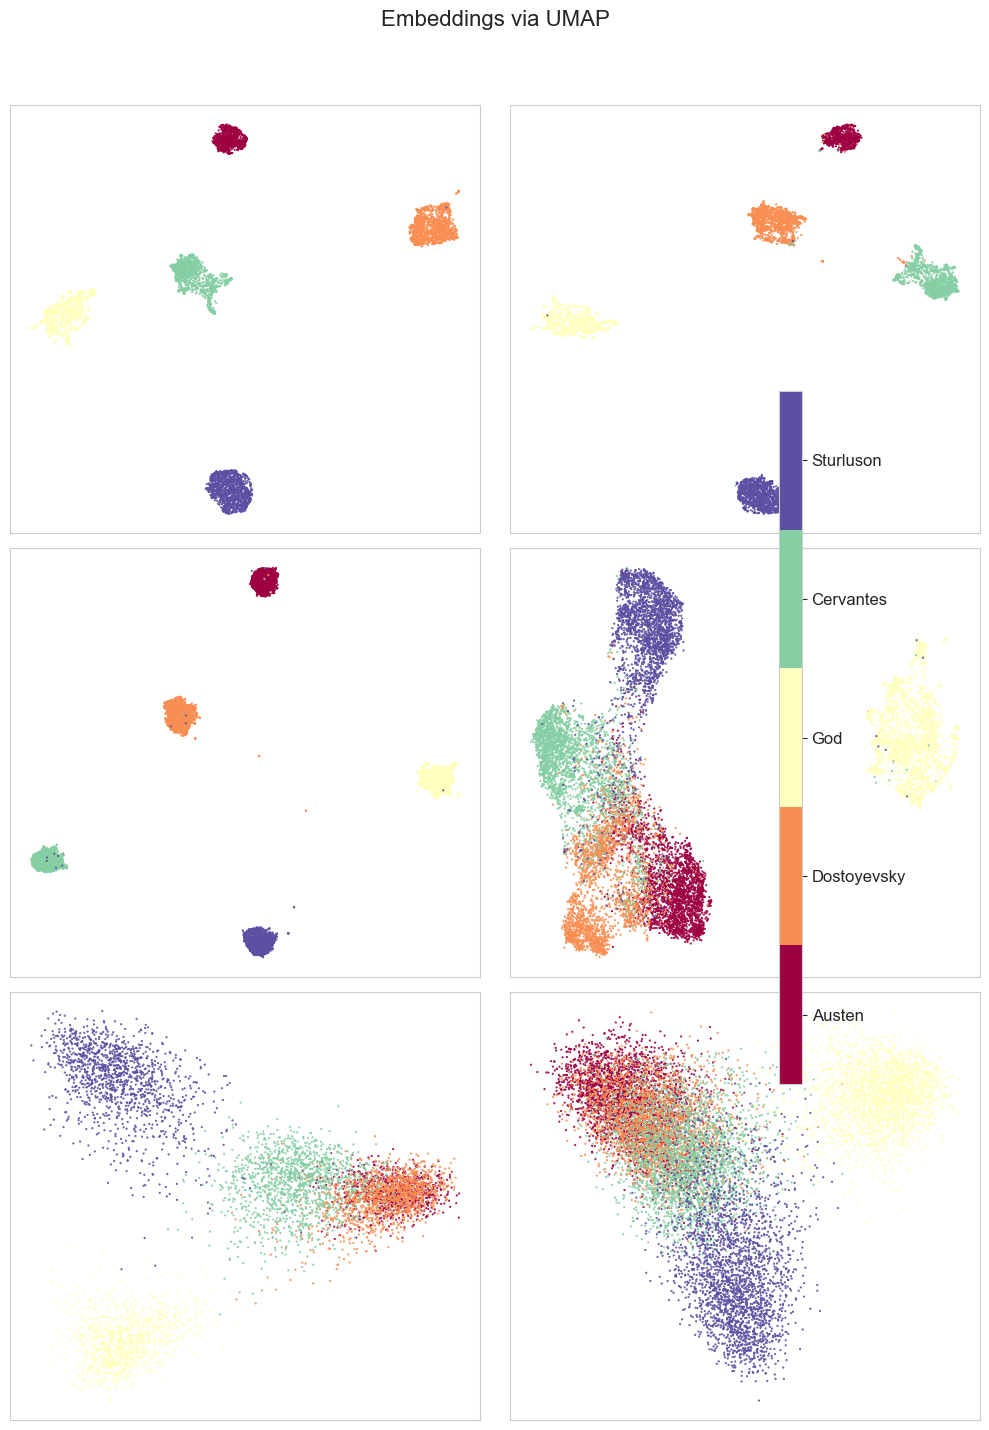

In [38]:
embedding_train_list = [umap_chunk_labels, umap_chunk, umap_sentences_labels, umap_sentences, pca_chunk, pca_sentences] 
y_list = [y_chunk, y_chunk, y_sent, y_sent, y_chunk, y_sent]
classes = ['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson']

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
axs = axs.flatten() 

# Plot each embedding in a subplot
for i in range(len(embedding_train_list)):
    sc = axs[i].scatter(*embedding_train_list[i].T, s=0.3, c=y_list[i], cmap='Spectral', alpha=1.0)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
# Add a colorbar to the left, shared across all subplots
cbar = fig.colorbar(sc, ax=axs, boundaries=np.arange(len(classes) + 1) - 0.5, shrink=0.6, aspect=30)
cbar.set_ticks(np.arange(len(classes)))
cbar.set_ticklabels(classes)

plt.suptitle('Embeddings via UMAP', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle
plt.show()
